In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import cv2
from tqdm import tqdm
from pycocotools import mask as cocomask

In [2]:
CURRENT_PATH = os.getcwd()
CURRENT_PATH = CURRENT_PATH.replace('\\', '/')

DATASET_STUFF_JSON_PATH = CURRENT_PATH + '/Dataset/stuff_annotations_trainval2017/annotations/'
DATASET_JSON_PATH = CURRENT_PATH + '/Dataset/annotations_trainval2017/annotations/'

DATASET_TRAIN_IMAGES_PATH = CURRENT_PATH + '/Dataset/train2017'
DATASET_VAL_IMAGES_PATH = CURRENT_PATH + '/Dataset/val2017'
DATASET_TEST_IMAGES_PATH = CURRENT_PATH + '/Dataset/test2017'

print('CURRENT_PATH: ', CURRENT_PATH)
print('DATASET_JSON_PATH: ', DATASET_JSON_PATH)
print('DATASET_TRAIN_IMAGES_PATH: ', DATASET_TRAIN_IMAGES_PATH)
print('DATASET_VAL_IMAGES_PATH: ', DATASET_VAL_IMAGES_PATH)
print('DATASET_TEST_IMAGES_PATH: ', DATASET_TEST_IMAGES_PATH)

CURRENT_PATH:  c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer
DATASET_JSON_PATH:  c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/Dataset/annotations_trainval2017/annotations/
DATASET_TRAIN_IMAGES_PATH:  c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/Dataset/train2017
DATASET_VAL_IMAGES_PATH:  c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/Dataset/val2017
DATASET_TEST_IMAGES_PATH:  c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/Dataset/test2017


In [3]:
IMAGES_PATH = CURRENT_PATH + '/ProcessedDatasetStuff512/images'
MASKS_PATH = CURRENT_PATH + '/ProcessedDatasetStuff512/masks'
CSV_PATH = CURRENT_PATH + '/ProcessedDatasetStuff512/csv'

print(IMAGES_PATH)
print(MASKS_PATH)
print(CSV_PATH)

c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/ProcessedDatasetStuff512/images
c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/ProcessedDatasetStuff512/masks
c:/Users/david/OneDrive/Documents/GitHub/TextualSegFormer/ProcessedDatasetStuff512/csv


In [4]:
instances_stuff_path_train = DATASET_STUFF_JSON_PATH + 'stuff_train2017.json'
instances_stuff_path_val = DATASET_STUFF_JSON_PATH + 'stuff_val2017.json'

instances_path_train = DATASET_JSON_PATH + 'instances_train2017.json'
instances_path_val = DATASET_JSON_PATH + 'instances_val2017.json'

In [5]:
with open(instances_stuff_path_train) as f:
    instances_stuff_train_json = json.load(f)
with open(instances_stuff_path_val) as f:
    instances_stuff_val_json = json.load(f)

with open(instances_path_train) as f:
    instances_train_json = json.load(f)
with open(instances_path_val) as f:
    instances_val_json = json.load(f)

with open(CURRENT_PATH + '/labels.json') as f:
    categories_dict = json.load(f)

In [6]:
base_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
20, 21, 22, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 
44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 
86, 87, 89, 90, 91, 92, 93, 95, 96, 97, 98,  99, 100, 101, 102, 103, 104, 105, 
106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 
123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 138, 139, 140, 141, 
142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 
159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
novel_class = [19, 23, 28, 29, 36, 51, 76, 88, 94, 112, 133, 136, 137, 157, 160]
both_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 
39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 
59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 
79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 
99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 
115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 
131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 
147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 
163, 164, 165, 166, 167, 168, 169, 170]

print(len(both_class))

seen_categories = []

for i in range(len(instances_val_json['annotations'])):
    category_id = instances_val_json['annotations'][i]['category_id']
    if category_id not in seen_categories:
        seen_categories.append(category_id)

for i in range(len(instances_stuff_val_json['annotations'])):
    category_id = instances_stuff_val_json['annotations'][i]['category_id']
    if category_id not in seen_categories:
        seen_categories.append(category_id)

print('Number of classes: ', len(seen_categories))

171
Number of classes:  172


In [7]:
base_class_names = []
novel_class_names = []
both_class_names = []

for i in range(len(base_class)):
    base_class_names.append(categories_dict[str(base_class[i])])

for i in range(len(novel_class)):
    novel_class_names.append(categories_dict[str(novel_class[i])])

for i in range(len(both_class)):
    both_class_names.append(categories_dict[str(both_class[i])])

print('base_class_names: ', base_class_names)
print('novel_class_names: ', novel_class_names)
print('both_class_names: ', both_class_names)

base_class_names:  ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'sheep', 'cow', 'elephant', 'zebra', 'giraffe', 'hat', 'backpack', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'hair drier', 'toothbrush', 'hair brush', 'banner', 'blanket', 'bridge', 'building-other', 'bush', 'cabinet', 'cage',

In [8]:
def fill_zeros_id(id):
    str_id = str(id)
    str_id = '0'*(12-len(str_id)) + str_id
    return str(str_id)

def join_mask_annotations(instances_json):
    images_annotations = {}
    for i in range(len(instances_json['annotations'])):
        idx = fill_zeros_id(instances_json['annotations'][i]['image_id'])
        category_id = instances_json['annotations'][i]['category_id']
        if idx not in images_annotations:
            images_annotations[idx] = {}
        if category_id not in images_annotations[idx]:
            images_annotations[idx][category_id] = []
        images_annotations[idx][category_id].append(instances_json['annotations'][i])

    return images_annotations

def save_img(mask, path):
    mask = cv2.resize(mask, (512, 512))
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path, mask)
    return

def preprocess_img(i, DATASET_IMAGES_PATH):
    img_str_filled = fill_zeros_id(i)
    image_str_name = img_str_filled + '.jpg'
    img_path = DATASET_IMAGES_PATH + '/' + image_str_name
    if not os.path.exists(img_path):
        # print('no existe alv')
        return None, img_str_filled, image_str_name
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     
    return img, img_str_filled, image_str_name

def decode_rle(rle_counts, size):
    height, width = size
    rle_encoding = [{'size': (height, width), 'counts': rle_counts}]
    mask = cocomask.decode(rle_encoding)
    mask_array = np.array(mask, dtype=np.uint8)
    return mask_array

def preprocess_split(instances_json, instances_stuff_json, DATASET_IMAGES_PATH, IMAGES_PATH, MASKS_PATH, CSV_PATH):

    idx = 0
    images, masks, category, category_id  = [], [], [], []

    images_annotations = join_mask_annotations(instances_json)

    if os.path.exists(IMAGES_PATH):
        os.system('rm -rf ' + IMAGES_PATH)
    if os.path.exists(MASKS_PATH):
        os.system('rm -rf ' + MASKS_PATH)

    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if not os.path.exists(MASKS_PATH):
        os.makedirs(MASKS_PATH)
    if not os.path.exists(CSV_PATH):
        os.makedirs(CSV_PATH)
        
    for i in tqdm(images_annotations):
        img, img_str_filled, image_str_name = preprocess_img(i, DATASET_IMAGES_PATH)
        if img is None:
            continue

        for j in images_annotations[i]:

            cat_id = images_annotations[i][j][0]['category_id']
            image_str_name_idx = img_str_filled + '_' + str(idx) + '.jpg'
            mask = np.zeros_like(img)
            
            for pts in images_annotations[i][j][0]['segmentation']:
                pts = np.array(pts, dtype=np.float32)
                pts = pts.reshape(-1, 2)
                cv2.fillPoly(mask, [pts.astype(np.int32)], (255, 255, 255))
                    
            save_img(mask, MASKS_PATH + '/' + image_str_name_idx)

            images.append(image_str_name)
            masks.append(image_str_name_idx)
            category.append(categories_dict[str(cat_id)])
            category_id.append(cat_id)

            idx += 1
        
        save_img(img, IMAGES_PATH + '/' + image_str_name)
    
    for i in tqdm(instances_stuff_json):

        id = i['image_id']
        img, img_str_filled, image_str_name = preprocess_img(id, DATASET_IMAGES_PATH)
        if img is None:
            continue         

        cat_id = i['category_id']
        if str(cat_id) not in categories_dict:
            continue   

        image_str_name_idx = img_str_filled + '_' + str(idx) + '.jpg'
        
        size = i['segmentation']['size']
        rle_counts = i['segmentation']['counts']

        mask = decode_rle(rle_counts, size)
        mask = (mask - np.min(mask)) * (255 / (np.max(mask) - np.min(mask)))
        mask = mask.astype(np.uint8)
                
        save_img(mask, MASKS_PATH + '/' + image_str_name_idx)
        save_img(img, IMAGES_PATH + '/' + image_str_name)

        images.append(image_str_name)
        masks.append(image_str_name_idx)
        category.append(categories_dict[str(cat_id)])
        category_id.append(cat_id)

        idx += 1

    df = pd.DataFrame({'image': images, 'mask': masks, 'label': category, 'category_id': category_id})
    return df

In [9]:
df = preprocess_split(instances_val_json, instances_stuff_val_json['annotations'], DATASET_VAL_IMAGES_PATH, IMAGES_PATH + '/val/', MASKS_PATH + '/val/', CSV_PATH)
df.to_csv(CSV_PATH + '/val.csv', index=False)

 11%|█         | 3596/32801 [00:45<06:11, 78.69it/s]C:\Users\david\AppData\Local\Temp\ipykernel_2760\248572506.py:106: RuntimeWarning: divide by zero encountered in divide
  mask = (mask - np.min(mask)) * (255 / (np.max(mask) - np.min(mask)))
C:\Users\david\AppData\Local\Temp\ipykernel_2760\248572506.py:106: RuntimeWarning: invalid value encountered in multiply
  mask = (mask - np.min(mask)) * (255 / (np.max(mask) - np.min(mask)))
C:\Users\david\AppData\Local\Temp\ipykernel_2760\248572506.py:107: RuntimeWarning: invalid value encountered in cast
  mask = mask.astype(np.uint8)
100%|██████████| 32801/32801 [06:52<00:00, 79.54it/s]


In [10]:
df = preprocess_split(instances_train_json, instances_stuff_train_json['annotations'], DATASET_TRAIN_IMAGES_PATH, IMAGES_PATH + '/train/', MASKS_PATH + '/train/', CSV_PATH)
df.to_csv(CSV_PATH + '/train.csv', index=False)

  3%|▎         | 25925/747458 [06:04<2:43:46, 73.43it/s]C:\Users\david\AppData\Local\Temp\ipykernel_2760\248572506.py:106: RuntimeWarning: divide by zero encountered in divide
  mask = (mask - np.min(mask)) * (255 / (np.max(mask) - np.min(mask)))
C:\Users\david\AppData\Local\Temp\ipykernel_2760\248572506.py:106: RuntimeWarning: invalid value encountered in multiply
  mask = (mask - np.min(mask)) * (255 / (np.max(mask) - np.min(mask)))
C:\Users\david\AppData\Local\Temp\ipykernel_2760\248572506.py:107: RuntimeWarning: invalid value encountered in cast
  mask = mask.astype(np.uint8)
100%|██████████| 747458/747458 [3:02:28<00:00, 68.27it/s]  


dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
j19[6h1ZNXNf1h1ZNYNe1g1[NYNf1f1YNZNh1e1YN^Nd1b1ZNbNd1^1ZNdNf1\1ZNdNf1\1ZNdNlKLo4_1UOBj0>kNNRLUNi4l1UO0RLUNh4k1UO;l0DTO<R1^OnNb0R1^OnNc0T1ZOlNg0X1TOhNm0V1SOkNm0T1TOlNl0T1TOjNbNmKZ2X5UOkNm0V1ROkNm0T1TOlNk0U1UOlNj0T1UOmNk0S1UOmNk0S1UOmNk0S1UOmNl0R1TOoNk0l0gMmJ01^1W4j0j0kMoJ[1W4j0j0kMoJ[1X4i0a0UNVKQ1Z4j0`0D@<`0D@<`0D@<`0D@<`0D@<`0D@=?CA=?BB>=CC==CB>:FF:?A@`0a0_O_Oa0b0^O_Ob0`0^O_Oc0a0]O@b0`0]OCa0<@D`0;AE?:BG=8DI;7EI<6DK;1I06OJ35MK35MK35MK35MK35MK45KK55KK55KK55KK64JK75IK75IK75IK75IK75IK84HL85GJ:6FJ:6FJ;5EK;5EK;5EK;5EK;5EK:7EI;7EH;9EG::FF9;GE9;GE9;GE9<EE:<FD:<FC;=EC=;CE=;CE<<DD<<DD=;CE=<BD?WNWKM5k1U41P1JPO6P1JoN7Q1IoN7Q1IoN7R1HnN8Q1JnN5S1KmN5S1KmN5S1KmN5T1JlN6T1JlN6T1JlN6S1KlN6P1SNkJg1U45n0WNmJe1T44o0XNlJd1U44o0XNkJe1V43o03QOMm0TNmJo1V4Mj08VOHi0:VOFk09UOGk09UOGk09UOFl0:SOGn08ROHn08ROHn08ROHn08UOEk0;WOCk0;VODk0<TOWNgKR1Y5c0ROYNeKT1Y5c0oNZNjKS1W5c0nNZNUMJn3k1nNZNb2f1aMWN_2j1aMSNeKOk6m1`40000002N1O2N01N10000O

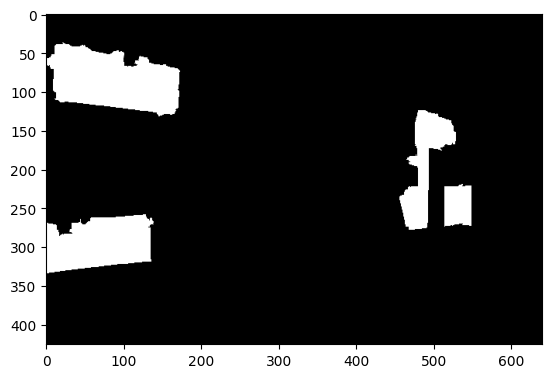

In [11]:
annotation = instances_stuff_val_json['annotations'][0]
print(annotation.keys())
height, width = annotation['segmentation']['size']
rle_counts = instances_stuff_val_json['annotations'][0]['segmentation']['counts']
print(rle_counts)
mask_array = decode_rle(rle_counts, (height, width))

print(mask_array.dtype)

import cv2
import numpy as np

image_array = (mask_array - np.min(mask_array)) * (255 / (np.max(mask_array) - np.min(mask_array)))
image_array = image_array.astype(np.uint8)

# Guardar el array como imagen utilizando OpenCV
cv2.imwrite('imagen.png', image_array)

plt.imshow(mask_array, cmap='gray')
plt.show()